<a href="https://colab.research.google.com/github/pavi-ninjaac/SARS_CoV_2_DNA_Analysis/blob/main/DNA_Analysis_CovidvsHIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid19 Detection using CGR(Choas Game Representation)

In [1]:
! pip install Bio

     |████████████████████████████████| 81kB 4.6MB/s 
     |████████████████████████████████| 2.3MB 10.0MB/s 


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for fasta file handling 
from Bio import SeqIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [35]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [37]:
def generate_data(file_list):
  X = []
  y = []
  label = 1 # for hiv
  for i in file_list:
    filepath = '/content/drive/MyDrive/Colab Notebooks/dataFiles/DNA_Genome_Analysis_covid19/'+i+'.fasta'
    records = list(SeqIO.parse(filepath , 'fasta'))

    for index in range(len(records)):
      X.append(str(records[index].seq))
      y.append(label)
    label = 0 #for covid19
  
  data = pd.DataFrame({'DNASequence' : X , 'label' : y})

  return data

In [38]:
file_list = ['Negative' , 'Covid19']
data = generate_data(file_list)
data.head(5)

,DNASequence,label
0,CCTCAAATCACTCTTTGGCAGCGACCCCTTGTCTCAATAAAAATAG...,1
1,CCTCAAATCACTCTTTGGCAACGACCCCTGGTCCCAATAAAAATAG...,1
2,CCTCAGATCACTCTTTGGCAGCGACCCCTTGTCTCAATAAAAATAG...,1
3,CCTCAGATCACTCTTTGGCAGCGACCCCTTGTCCCAATAAAAGTAG...,1
4,CCTCAAATCACTCTTTGGCAGCGACCCCTTGTCCCAATAAAAGTAG...,1


In [40]:
d = data.iloc[0,:]
print(d)

DNASequence    CCTCAAATCACTCTTTGGCAGCGACCCCTTGTCTCAATAAAAATAG...
label                                                          1
Name: 0, dtype: object


# Category analysis

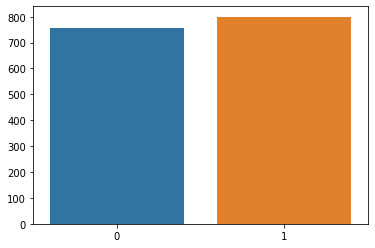

In [5]:
category = data['label'].value_counts()
sns.barplot(x=category.index,y=category.values)

In [6]:
#convert the squenceof strings to k-mers 
def kmer(sequence , size = 7):
  return [sequence[i:i+size].lower() for i in range(len(sequence) - size+1 )]

data['words'] = data.apply(lambda x : kmer(x['DNASequence']) , axis = 1)
data = data.drop('DNASequence' , axis = 1)
data.head()

,label,words
0,1,"[cctcaaa, ctcaaat, tcaaatc, caaatca, aaatcac, ..."
1,1,"[cctcaaa, ctcaaat, tcaaatc, caaatca, aaatcac, ..."
2,1,"[cctcaga, ctcagat, tcagatc, cagatca, agatcac, ..."
3,1,"[cctcaga, ctcagat, tcagatc, cagatca, agatcac, ..."
4,1,"[cctcaaa, ctcaaat, tcaaatc, caaatca, aaatcac, ..."


In [7]:
#join into  one sentence
data_x = data['words']
for i in range(len(data_x)):
  data_x[i] = ' '.join(data_x[i])
y = np.array(data['label'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
data_x[0]

'cctcaaa ctcaaat tcaaatc caaatca aaatcac aatcact atcactc tcactct cactctt actcttt ctctttg tctttgg ctttggc tttggca ttggcag tggcagc ggcagcg gcagcga cagcgac agcgacc gcgaccc cgacccc gacccct acccctt ccccttg cccttgt ccttgtc cttgtct ttgtctc tgtctca gtctcaa tctcaat ctcaata tcaataa caataaa aataaaa ataaaaa taaaaat aaaaata aaaatag aaatagg aatagga ataggag taggagr aggagrc ggagrcc gagrcca agrccar grccara rccaray ccaraya carayaa arayaar rayaara ayaarag yaaraga aaragag aragagg ragaggc agaggct gaggctc aggctct ggctcta gctctat ctctatt tctatta ctattag tattaga attagac ttagaca tagacac agacaca gacacag acacagg cacagga acaggag caggagc aggagca ggagcag gagcaga agcagat gcagatg cagatga agatgat gatgata atgatac tgataca gatacag atacagt tacagta acagtat cagtatt agtatta gtattag tattaga attagaa ttagaag tagaaga agaagaa gaagaaa aagaaat agaaata gaaataa aaataaa aataaat ataaatt taaattt aaatttg aatttgc atttgcc tttgcca ttgccag tgccagg gccagga ccaggaa caggaaa aggaaaa ggaaaat gaaaatg aaaatgg aaatgga aatggaa atggaaa tggaaac ggaaacc

In [9]:
# convert into count vectorizer features
cv = CountVectorizer( ngram_range = (1,1))
X = cv.fit_transform(data_x).toarray()

In [10]:
X.shape

(1557, 28137)

In [11]:
X_df = pd.DataFrame(X, columns= cv.get_feature_names())
X_df.head()

,aaaaaaa,aaaaaac,aaaaaag,aaaaaan,aaaaaat,aaaaaaw,aaaaaca,aaaaacc,aaaaacg,aaaaacn,aaaaact,aaaaaga,aaaaagc,aaaaagg,aaaaagn,aaaaagr,aaaaagt,aaaaana,aaaaann,aaaaara,aaaaarg,aaaaart,aaaaata,aaaaatc,aaaaatg,aaaaatm,aaaaatn,aaaaatt,aaaaaty,aaaaawa,aaaaayc,aaaaaym,aaaacaa,aaaacac,aaaacag,aaaacan,aaaacat,aaaacca,aaaaccc,aaaaccg,...,ytgyaaa,ytgytyt,ytmrakk,ytmrggg,ytrgcag,yttaaga,yttacag,yttacca,yttagaa,yttagac,yttagag,yttagca,yttaraa,yttcagg,yttcttt,yttgaag,yttgcca,yttggac,yttggcc,yttgggt,yttgtat,yttgtta,yttgttc,yttgyta,yttrcca,ytttaat,ytttaga,ytttagg,ytttatc,ytttcaa,ytttgat,ytttggc,yttttca,yttttgg,ytwgaat,ytytgga,ywggytg,ywtatta,yyactas,yytatag
0,0,1,1,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,2,1,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,1,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,2,2,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#split the data into train and split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

In [13]:

print("Shape of the training data----->",X_train.shape)
print("Shape of the training target data----->",y_train.shape)
print("Shape of the testing data----->",X_test.shape)
print("Shape of the testing target data----->",y_test.shape)

Shape of the training data-----> (1245, 28137)
Shape of the training target data-----> (1245,)
Shape of the testing data-----> (312, 28137)
Shape of the testing target data-----> (312,)


In [14]:
#train the model
mNB = MultinomialNB(alpha = 0.1)
mNB.fit(X_train , y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [15]:

y_pred = mNB.predict(X_test)

In [16]:

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0    1
Actual             
0          145    0
1            0  167
accuracy = 1.000 
precision = 1.000 
recall = 1.000 
f1 = 1.000


# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
y_pred_rfc = rfc.predict(X_test)

In [19]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_rfc)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0    1
Actual             
0          145    0
1            0  167
accuracy = 0.994 
precision = 0.994 
recall = 0.994 
f1 = 0.994


In [21]:
import pickle
pickle.dump(rfc, open('/content/drive/MyDrive/Colab Notebooks/dataFiles/DNA_Genome_Analysis_covid19/model_rf.pkl','wb'))

#load the model
model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/dataFiles/DNA_Genome_Analysis_covid19/model_rf.pkl','rb'))


In [30]:
data = X_train[0,:].reshape(1,-1)
model.predict(data)

array([1])

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

In [ ]:
y_pred_svc = svc.predict(X_test)

In [ ]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_svc)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))